In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from pandas.tseries.offsets import DateOffset
import xarray as xr

/home/maltem/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


## Read data

In [2]:
date_postfix=20230226

# Data from Infrared Sensor
file_path='data/cruise/CR1000-koffert_IR120Data-1min-kvs-2024.dat'
df = pd.read_csv(file_path, skiprows=[0, 2, 3], parse_dates=['TIMESTAMP'], index_col='TIMESTAMP')


if (False):

    start_time = pd.to_datetime('2024-02-26 15:00')
    end_time   = pd.to_datetime('2024-02-27 15:00')
    
elif (True):
    start_time = pd.to_datetime('2024-04-11 13:00')
    end_time   = pd.to_datetime('2024-04-12 7:00')
    
df = df[df.index >= start_time]
df = df[df.index <= end_time]


# Verschieben von df1 um +1 Stunde
df_shifted = df.index + DateOffset(hours=-1.3)
df.index = df_shifted


IRtemp=np.array(df['IR_sensorTempTCE098'].values)

IRtemp[IRtemp=='-9.99']=np.nan

In [3]:
OMBraw = xr.open_mfdataset('data/cruise/2024_KVS_deployment.nc')

In [4]:
buoynr=5
tsi_b  = np.array(OMBraw.temp_snowice_calibrated[buoynr,:])

ts_b   = np.array(OMBraw.temp_snowsurface_calibrated[buoynr,:])

t1m_b  = np.array(OMBraw.temp_1m_calibrated[buoynr,:])

t10cm_b = np.array(OMBraw.temp_10cm_calibrated[buoynr,:])

time_b = np.array(OMBraw.time_temp[buoynr,:])


In [5]:
OMBraw.sel(trajectory="KVS-12")

<xarray.Dataset>
Dimensions:                              (frequencies_waves_imu: 55, obs: 513,
                                          obs_temp: 516, obs_waves_imu: 129)
Coordinates:
    trajectory                           <U6 'KVS-12'
  * frequencies_waves_imu                (frequencies_waves_imu) float64 0.04...
Dimensions without coordinates: obs, obs_temp, obs_waves_imu
Data variables: (12/23)
    time                                 (obs) datetime64[ns] dask.array<chunksize=(513,), meta=np.ndarray>
    lat                                  (obs) float64 dask.array<chunksize=(513,), meta=np.ndarray>
    lon                                  (obs) float64 dask.array<chunksize=(513,), meta=np.ndarray>
    time_temp                            (obs_temp) datetime64[ns] dask.array<chunksize=(516,), meta=np.ndarray>
    temp_1m_raw                          (obs_temp) float64 dask.array<chunksize=(516,), meta=np.ndarray>
    temp_10cm_raw                        (obs_temp) float64 dask.array<chunksize=(516,), meta=np.ndarray>
    ...                                   ...
    pHs0                                 (obs_waves_imu) float64 dask.array<chunksize=(129,), meta=np.ndarray>
    pT02                                 (obs_waves_imu) float64 dask.array<chunksize=(129,), meta=np.ndarray>
    pT24                                 (obs_waves_imu) float64 dask.array<chunksize=(129,), meta=np.ndarray>
    Hs0                                  (obs_waves_imu) float64 dask.array<chunksize=(129,), meta=np.ndarray>
    T02                                  (obs_waves_imu) float64 dask.array<chunksize=(129,), meta=np.ndarray>
    T24                                  (obs_waves_imu) float64 dask.array<chunksize=(129,), meta=np.ndarray>
Attributes:
    temp_calibration_information:  calibration: crrt_instrument_name = 'KVS-0...
    creator_name:                  Jean Rabault
    creator_email:                 jean.rblt@gmail.com
    title:                         OMB 2024 deployment North East of Svalbard...
    summary:                       The OMB 2024 KV-Svalbard deployment buoys ...

In [6]:
for i in range(len(IRtemp)):
    IRtemp[i]=float(IRtemp[i])

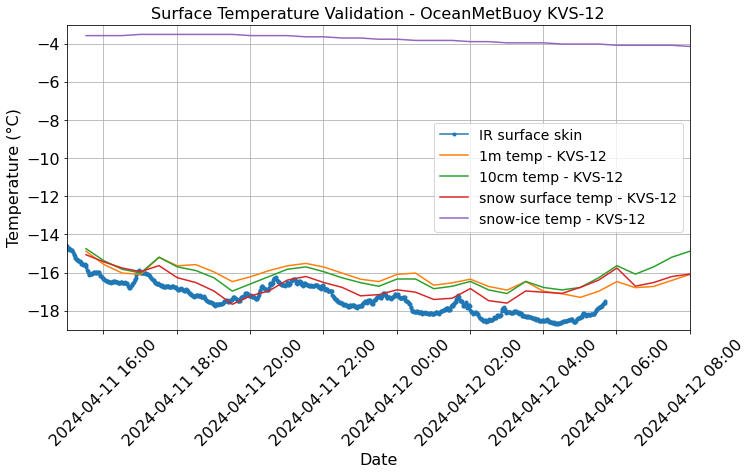

In [20]:
start_time = pd.to_datetime('2024-04-11 15:00')
end_time   = pd.to_datetime('2024-04-12 8:00')


plt.figure(figsize=(10, 6))
#plt.plot(df.index.values,np.array(df['PT100_temp_Avg'].values), marker='.', linestyle='-', label='PT-100 Steinar')
plt.plot(df.index.values,IRtemp, marker='.', linestyle='-', label='IR surface skin')

plt.plot(time_b,t1m_b,label = '1m temp - KVS-12')
plt.plot(time_b,t10cm_b, label = '10cm temp - KVS-12')
plt.plot(time_b,ts_b, label = 'snow surface temp - KVS-12')
plt.plot(time_b,tsi_b, label = 'snow-ice temp - KVS-12')
plt.title('Surface Temperature Validation - OceanMetBuoy KVS-12',fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Date',fontsize=16)
plt.ylabel('Temperature (°C)',fontsize=16)
plt.grid(True)
plt.xticks(rotation=45,fontsize=16)
plt.legend(fontsize=14)
plt.tight_layout()
# Formatierung der X-Achse
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=2))
# Anzeigen des Plots
plt.xlim(start_time, end_time)
plt.ylim([-19,-3])
plt.show()

In [19]:
tsi_b

array([-3.57831408, -3.57831408, -3.57831408, -3.51501451, -3.51501451,
       -3.51501451, -3.51501451, -3.51501451, -3.51501451, -3.57831408,
       -3.57831408, -3.57831408, -3.64161364, -3.64161364, -3.70491321,
       -3.70491321, -3.76821277, -3.76821277, -3.83151234, -3.83151234,
       -3.83151234, -3.89481191, -3.89481191, -3.95811147, -3.95811147,
       -3.95811147, -4.02141104, -4.02141104, -4.02141104, -4.08471061,
       -4.08471061, -4.08471061, -4.08471061, -4.14801017, -4.14801017,
       -4.14801017, -4.14801017, -4.14801017, -4.14801017, -4.14801017,
       -4.21130974, -4.21130974, -4.21130974, -4.21130974, -4.21130974,
       -4.21130974, -4.21130974, -4.27460931, -4.27460931, -4.27460931,
       -4.27460931, -4.27460931, -4.27460931, -4.27460931, -4.33790887,
       -4.33790887, -4.33790887, -4.33790887, -4.33790887, -4.40120844,
       -4.40120844, -4.40120844, -4.40120844, -4.40120844, -4.46450801,
       -4.46450801, -4.46450801, -4.46450801, -4.52780757, -4.52